<p>Introdução: Nos basearemos em gorjetas e sabemos aplicamos 10% do valor total da conta no Brasil, enquanto em demais países os clientes têm costume de dar caixinha livremente, sem uma porcentagem específica.</p>

# Importando base de dados

In [1]:
import pandas as pd
import seaborn as sns
!pip show seaborn
!pip show pandas

Name: seaborn
Version: 0.11.1
Summary: seaborn: statistical data visualization
Home-page: https://seaborn.pydata.org
Author: Michael Waskom
Author-email: mwaskom@nyu.edu
License: BSD (3-clause)
Location: c:\users\reina\anaconda3\lib\site-packages
Requires: scipy, pandas, numpy, matplotlib
Required-by: 
Name: pandas
Version: 1.2.4
Summary: Powerful data structures for data analysis, time series, and statistics
Home-page: https://pandas.pydata.org
Author: None
Author-email: None
License: BSD
Location: c:\users\reina\anaconda3\lib\site-packages
Requires: python-dateutil, pytz, numpy
Required-by: statsmodels, seaborn


In [2]:
dados = pd.read_csv('dados/tips.csv')

In [3]:
dados.head()

,total_bill,tip,dessert,day,time,size
0,16.99,1.01,No,Sun,Dinner,2
1,10.34,1.66,No,Sun,Dinner,3
2,21.01,3.50,No,Sun,Dinner,3
3,23.68,3.31,No,Sun,Dinner,2
4,24.59,3.61,No,Sun,Dinner,4


# Tradução dos dados

In [4]:
troca = {'total_bill':'valor_da_conta',
         'tip':'gorjeta',
         'dessert':'sobremesa',
         'day':'dia_da_semana',
         'time':'hora_do_dia',
         'size':'total_de_pessoas'}
gorjetas = dados.rename(columns=troca)
gorjetas.head()

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas
0,16.99,1.01,No,Sun,Dinner,2
1,10.34,1.66,No,Sun,Dinner,3
2,21.01,3.50,No,Sun,Dinner,3
3,23.68,3.31,No,Sun,Dinner,2
4,24.59,3.61,No,Sun,Dinner,4


In [5]:
gorjetas.sobremesa.unique()

array(['No', 'Yes'], dtype=object)

In [6]:
sim_nao = {
    'No':'Não',
    'Yes':'Sim'
}
gorjetas.sobremesa.map(sim_nao)

0      Não
1      Não
2      Não
3      Não
4      Não
      ... 
239    Não
240    Sim
241    Sim
242    Não
243    Não
Name: sobremesa, Length: 244, dtype: object

In [7]:
gorjetas.head()  # nao ficou salvo

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas
0,16.99,1.01,No,Sun,Dinner,2
1,10.34,1.66,No,Sun,Dinner,3
2,21.01,3.50,No,Sun,Dinner,3
3,23.68,3.31,No,Sun,Dinner,2
4,24.59,3.61,No,Sun,Dinner,4


In [8]:
gorjetas.sobremesa = gorjetas.sobremesa.map(sim_nao)
gorjetas.head()

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas
0,16.99,1.01,Não,Sun,Dinner,2
1,10.34,1.66,Não,Sun,Dinner,3
2,21.01,3.50,Não,Sun,Dinner,3
3,23.68,3.31,Não,Sun,Dinner,2
4,24.59,3.61,Não,Sun,Dinner,4


In [9]:
gorjetas.dia_da_semana.unique()

array(['Sun', 'Sat', 'Thur', 'Fri'], dtype=object)

In [10]:
dias = {
    'Sun':'Domingo',
    'Sat':'Sábado',
    'Thur':'Quinta',
    'Fri':'Sexta'
}
gorjetas.dia_da_semana = gorjetas.dia_da_semana.map(dias)


In [11]:
gorjetas.head(1)

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas
0,16.99,1.01,Não,Domingo,Dinner,2


In [12]:
gorjetas.dia_da_semana.unique()

array(['Domingo', 'Sábado', 'Quinta', 'Sexta'], dtype=object)

In [13]:
gorjetas.hora_do_dia.unique()

array(['Dinner', 'Lunch'], dtype=object)

In [14]:
hora = { 
    'Dinner':'Jantar',
    'Lunch':'Almoço'
}

gorjetas.hora_do_dia = gorjetas.hora_do_dia.map(hora)


In [15]:
gorjetas.sample(5)

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas
211,25.89,5.16,Sim,Sábado,Jantar,4
42,13.94,3.06,Não,Domingo,Jantar,2
76,17.92,3.08,Sim,Sábado,Jantar,2
195,7.56,1.44,Não,Quinta,Almoço,2
4,24.59,3.61,Não,Domingo,Jantar,4


# Análise 1 - Valor da conta e gorjeta

In [16]:
gorjetas.columns

Index(['valor_da_conta', 'gorjeta', 'sobremesa', 'dia_da_semana',
       'hora_do_dia', 'total_de_pessoas'],
      dtype='object')

<AxesSubplot:xlabel='valor_da_conta', ylabel='gorjeta'>

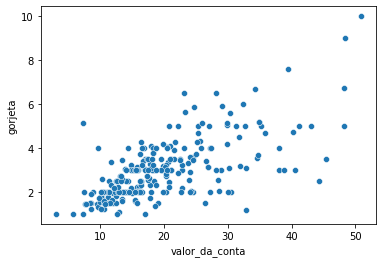

In [17]:
valor_gorjeta = sns.scatterplot(x='valor_da_conta',y='gorjeta',data=gorjetas)
valor_gorjeta.

**Visualmente, o valor da gorjeta aumenta conforme aumenta o valor da conta**

In [22]:
print('A base de dados contém {} registros. \n'.format(gorjetas.shape[0]))
print('Registros não nulos:')
gorjetas.count()

A base de dados contém 244 registros. 

Registros não nulos:


valor_da_conta      244
gorjeta             244
sobremesa           244
dia_da_semana       244
hora_do_dia         244
total_de_pessoas    244
dtype: int64

# Criando o campo ' porcentagem '

In [24]:
gorjetas.head(1)

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas
0,16.99,1.01,Não,Domingo,Jantar,2


In [25]:
gorjetas['porcentagem'] = gorjetas['gorjeta'] /gorjetas['valor_da_conta']

In [30]:
gorjetas.head(3)

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas,porcentagem
0,16.99,1.01,Não,Domingo,Jantar,2,0.06
1,10.34,1.66,Não,Domingo,Jantar,3,0.16
2,21.01,3.50,Não,Domingo,Jantar,3,0.17


In [27]:
gorjetas.porcentagem = gorjetas.porcentagem.round(2)

In [29]:
gorjetas.head(3)

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas,porcentagem
0,16.99,1.01,Não,Domingo,Jantar,2,0.06
1,10.34,1.66,Não,Domingo,Jantar,3,0.16
2,21.01,3.50,Não,Domingo,Jantar,3,0.17


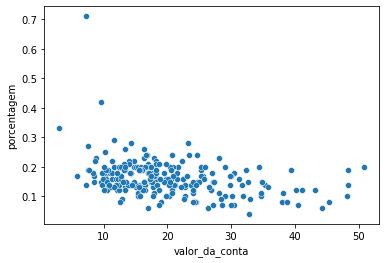

In [31]:
porcentagem_conta = sns.scatterplot(x='valor_da_conta',y='porcentagem',data=gorjetas)

**Visualmente o valor da conta não é proporcional ao valor da gorjeta**

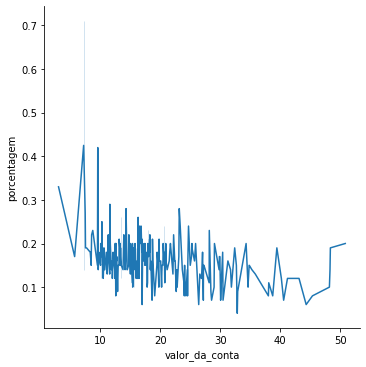

In [34]:
porcentagem_conta_linha = sns.relplot(x='valor_da_conta', y='porcentagem',data=gorjetas, kind='line')

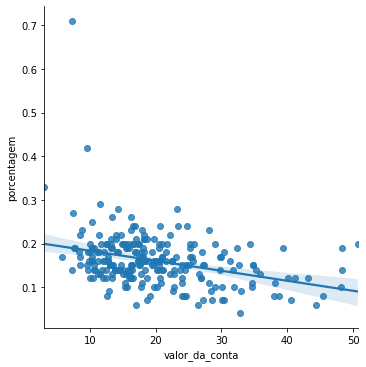

In [35]:
sns.lmplot(x='valor_da_conta', y='porcentagem',data=gorjetas)